In [6]:
import os

In [7]:
# !kaggle datasets download -d yasserh/wine-quality-dataset


In [8]:
# !unzip wine-quality-dataset.zip

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
wines = pd.read_csv('./WineQT.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
wines.set_index('Id', inplace=True)

In [13]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [14]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


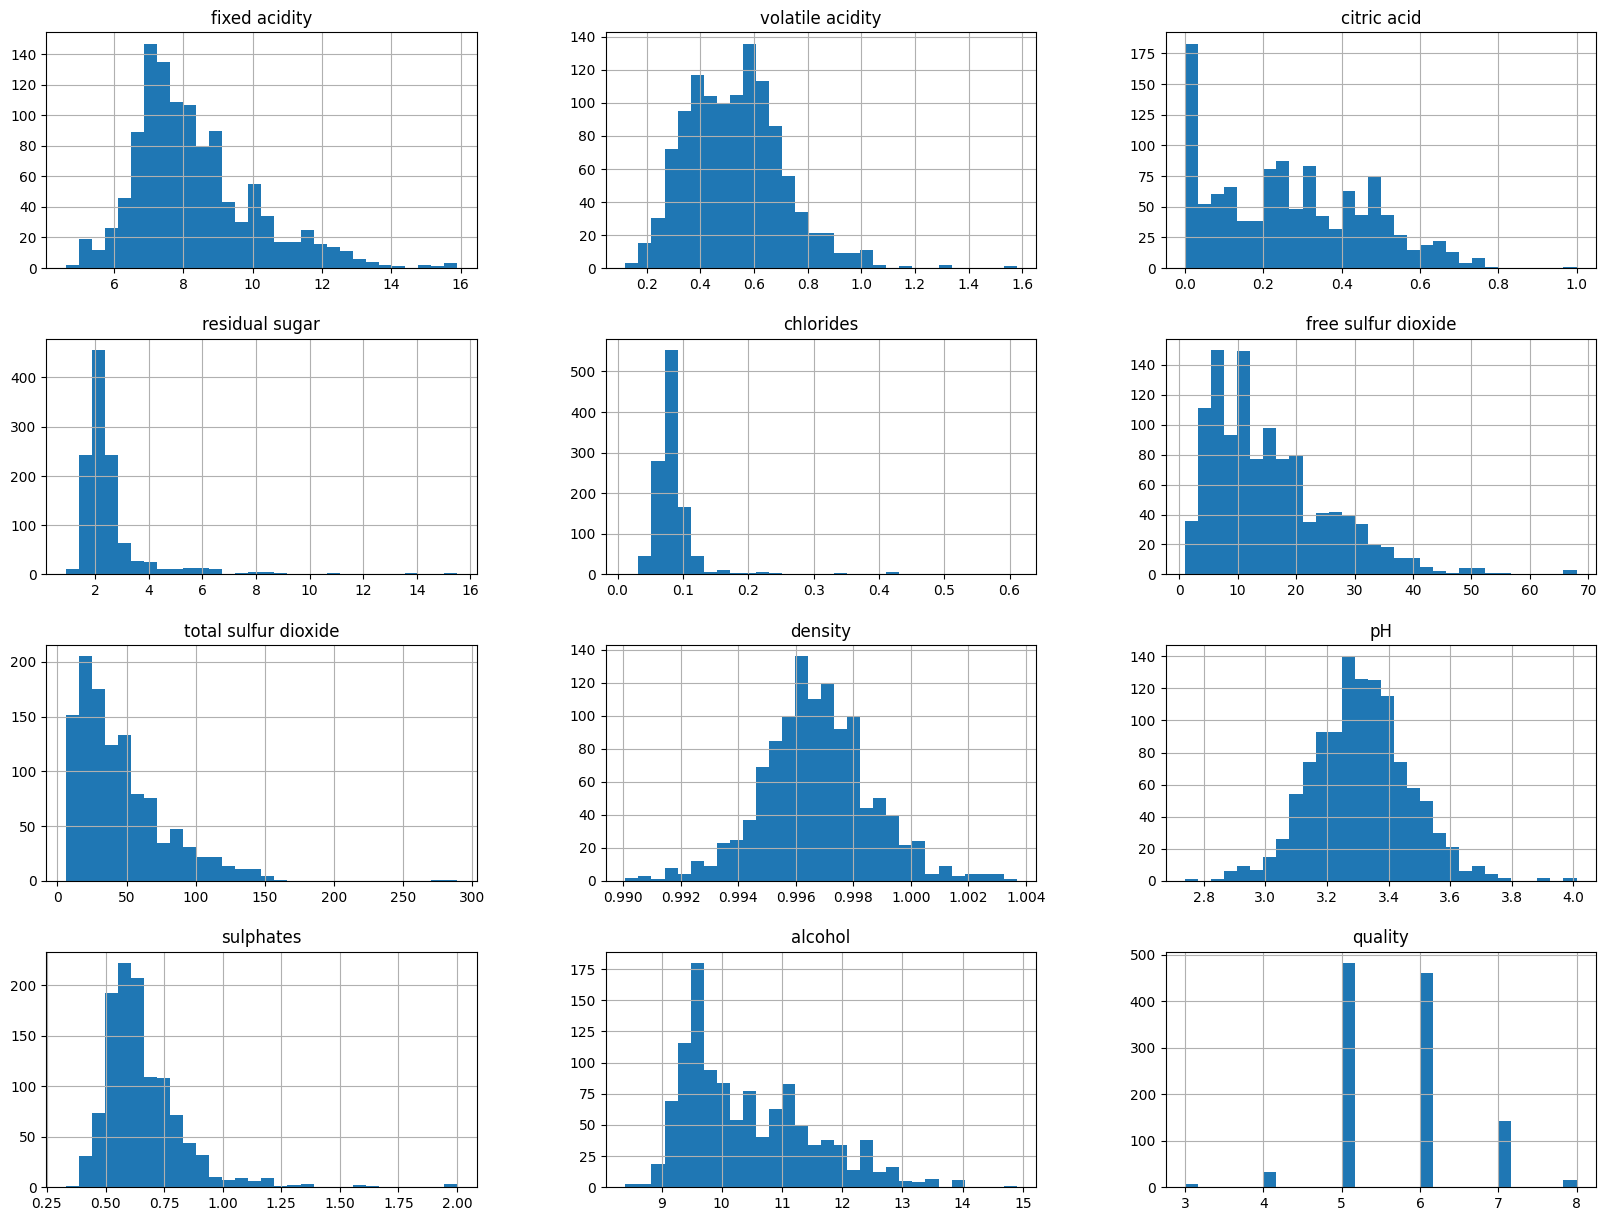

In [15]:
wines.hist(bins=30, figsize=(20,15))
plt.show()

In [16]:
X = wines.drop(columns='quality')
y = wines['quality']

In [17]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test_scaled)

In [22]:
mean_squared_error(y_test, y_pred)

0.38003245026277527

In [23]:
lr.score(X_test_scaled, y_test)

0.3170693672733127

In [24]:
def eval_metrics(actual, pred):
    rmse=np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [25]:
rmse, mae, r2=eval_metrics(y_test, y_pred)

In [26]:
print(f'rmse: {rmse}, mae:{mae}, r2:{r2}')

rmse: 0.6164677203737234, mae:0.47733983525886087, r2:0.3170693672733127


In [27]:
from sklearn.model_selection import GridSearchCV, KFold

In [28]:
from sklearn.linear_model import ElasticNet

In [33]:
k = KFold(n_splits=5, random_state=None)
model = ElasticNet()
params = {
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'l1_ratio': [0.001, 0.01, 0.1, 0.5, 1]
}
grid_model = GridSearchCV(estimator=model, param_grid=params, cv=k)
grid_model.fit(X_train_scaled, y_train)

c:\Users\user\anaconda3\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.035e+01, tolerance: 4.866e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.353e+02, tolerance: 4.959e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 1]})

In [34]:
grid_model.best_params_

{'alpha': 0.001, 'l1_ratio': 0.001}

In [31]:
res = pd.DataFrame(grid_model.cv_results_)
res = res[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='mean_test_score', ascending=False)
res.head(10)
# res

,params,mean_test_score,rank_test_score
18,"{'alpha': 0.001, 'l1_ratio': 0.001}",0.356490,1
19,"{'alpha': 0.001, 'l1_ratio': 0.01}",0.356486,2
20,"{'alpha': 0.001, 'l1_ratio': 0.1}",0.356452,3
21,"{'alpha': 0.001, 'l1_ratio': 1}",0.355644,4
12,"{'alpha': 1e-08, 'l1_ratio': 0.001}",0.354552,5
13,"{'alpha': 1e-08, 'l1_ratio': 0.01}",0.354552,6
14,"{'alpha': 1e-08, 'l1_ratio': 0.1}",0.354552,7
15,"{'alpha': 1e-08, 'l1_ratio': 1}",0.354552,8
6,"{'alpha': 1e-10, 'l1_ratio': 0.001}",0.354552,9
7,"{'alpha': 1e-10, 'l1_ratio': 0.01}",0.354552,10


In [35]:
grid_model

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 1]})

In [36]:
y_pred_test= grid_model.predict(X_test_scaled)
rmse, mae, r2=eval_metrics(y_test, y_pred_test)

print(f'rmse: {rmse}, mae:{mae}, r2:{r2}')

rmse: 0.6101103102333456, mae:0.4741465199767227, r2:0.33108237377714
